# Tokenization and Stemming
- Select a business b1 randomly from the dataset, then extract all reviews for b1 to form a small dataset B1. 
- Show word frequency distributions in B1 before and after stemming, respectively.
    - You may choose the stemming algorithm implemented in any toolkit. You may consider to plot the word frequency distributions in log-scale. 
- Repeat the same process for another randomly selected business b2.
- Discuss your findings based on your plots.
- List the top-10 most frequent words (exclude stopwords) before and after performing stemming, for each of the two selected businesses. 
- Discuss your findings.
    - note: Stop words are the words that are commonly used but do not carry much semantic meaning such as a, the, of, and.

In [1]:
import json
import pandas as pd
import random
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import seaborn as sb
from nltk.corpus import stopwords

In [2]:
# read data
data_path = 'C:\\Users\\tanch\\Documents\\NTU\\NTU Year 3\\Sem 1\\CZ4045 Natural Language Processing\\Assignment 1\\local\\data\\reviewSelected100\\reviewSelected100.json'
reviews = []
with open(data_path,"r") as f:
    for l in f.readlines():
        reviews.append(json.loads(l))

In [3]:
# convert to dataframe
reviews_df = pd.DataFrame(reviews)
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


#### randomly select b1 and b2

In [4]:
print("Number of businesses:", len(reviews_df.business_id.unique()))
random.seed(0)
b1, b2 = random.sample(list(reviews_df.business_id.unique()),2)
print("Randomly selected b1: ", b1)
print("Randomly selected b2: ", b2)

Number of businesses: 153
Randomly selected b1:  a6mYyhGgxWhnhrGDHzOTPA
Randomly selected b2:  0Rni7ocMC_Lg2UH0lDeKMQ


#### extract B1 and B2
- i.e reviews for b1 and b2 respectively

In [5]:
B1 = reviews_df.loc[reviews_df.business_id==b1,"text"].tolist()
B2 = reviews_df.loc[reviews_df.business_id==b2,"text"].tolist()

### Cleaning, Tokenization and extracting word frequencies 
- we tokenize using RegexpTokenizer(r"\w+") where:
    - all non-alphanumeric characters are removed e.g slashes, fullstops and newlines
    - each token is an alphanumeric word
- all tokens are converted to lower case
- word frequencies are extracted and stored in Counter objects 

In [6]:
# stores word frequencies
B1_word_frequencies_unstemmed = Counter()
B1_word_frequencies_stemmed = Counter()
B2_word_frequencies_unstemmed = Counter()
B2_word_frequencies_stemmed = Counter()

In [7]:
tokenizer = RegexpTokenizer(r"\w+")
ps = PorterStemmer()

In [8]:
for r in B1:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)]   
    B1_word_frequencies_unstemmed+=Counter(review_unstemmed)      # tokenize, convert to lower case and update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B1_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

In [9]:
for r in B2:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)]   
    B2_word_frequencies_unstemmed+=Counter(review_unstemmed)      # tokenize, convert to lower case and update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B2_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

# Word Frequency Distributions (with stopwords)

In [10]:
def bar_plotter(frequencies, title, top_n = 30, logx = False):
    idx, values = zip(*frequencies.most_common(top_n))                 # sort frequencies
    pd.Series(values[::-1],idx[::-1]).plot(kind = "barh",figsize = (8,8),title = title, logx = logx)   # bar plot

### B1

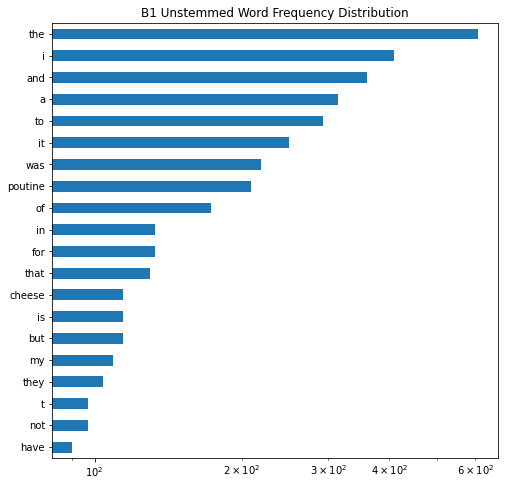

In [11]:
bar_plotter(B1_word_frequencies_unstemmed,
            title = "B1 Unstemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

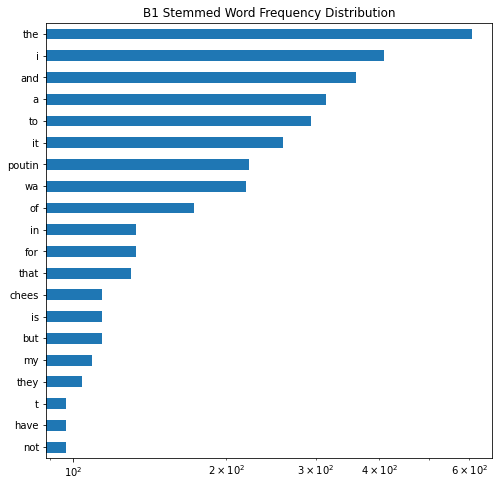

In [12]:
bar_plotter(B1_word_frequencies_stemmed,
            title = "B1 Stemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### B2

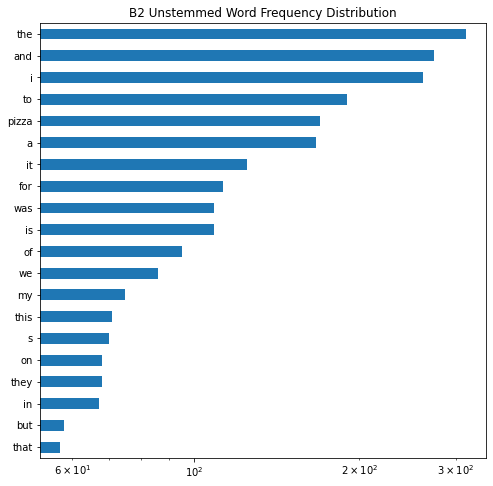

In [13]:
bar_plotter(B2_word_frequencies_unstemmed,
            title = "B2 Unstemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

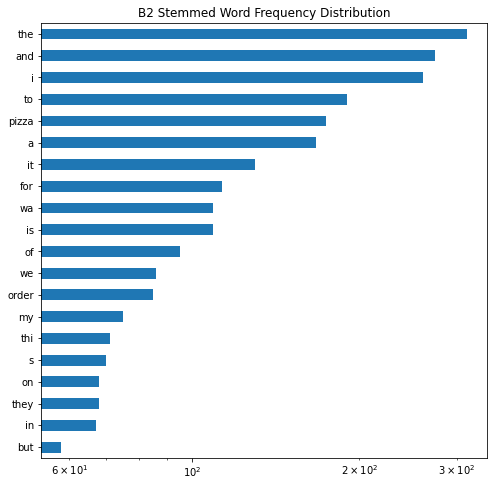

In [14]:
bar_plotter(B2_word_frequencies_stemmed,
            title = "B2 Stemmed Word Frequency Distribution",
            top_n = 20,
            logx = True)

### Cleaning, Tokenization, extracting word frequencies + remove stopwords
- we tokenize using RegexpTokenizer(r"\w+") where:
    - all non-alphanumeric characters are removed e.g slashes, fullstops and newlines
    - each token is an alphanumeric word
- all tokens are converted to lower case
- all stopwords are removed
- word frequencies are extracted and stored in Counter objects 

In [15]:
# stores word frequencies
B1_word_frequencies_unstemmed = Counter()
B1_word_frequencies_stemmed = Counter()
B2_word_frequencies_unstemmed = Counter()
B2_word_frequencies_stemmed = Counter()

In [16]:
tokenizer = RegexpTokenizer(r"\w+")
ps = PorterStemmer()

In [17]:
# get all stopwords
stopwords_list = set(stopwords.words('english'))

In [18]:
for r in B1:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)] # tokenize and lower case 
    review_unstemmed = [token for token in review_unstemmed if token not in stopwords_list] # remove stopwords
    B1_word_frequencies_unstemmed+=Counter(review_unstemmed)      # update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B1_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

In [19]:
for r in B2:
    review_unstemmed = [token.lower() for token in tokenizer.tokenize(r)] # tokenize and lower case 
    review_unstemmed = [token for token in review_unstemmed if token not in stopwords_list] # remove stopwords
    B2_word_frequencies_unstemmed+=Counter(review_unstemmed)      # update unstemmed frequency store
    review_stemmed = [ps.stem(token) for token in review_unstemmed]
    B2_word_frequencies_stemmed+=Counter(review_stemmed)         # stem and update stemmed frequency store

# Word Frequency Distributions (stopwords removed)

In [20]:
def bar_plotter(frequencies, title, top_n = 30, logx = False):
    idx, values = zip(*frequencies.most_common(top_n))                 # sort frequencies
    pd.Series(values[::-1],idx[::-1]).plot(kind = "barh",figsize = (8,8),title = title, logx = logx)   # bar plot

### B1

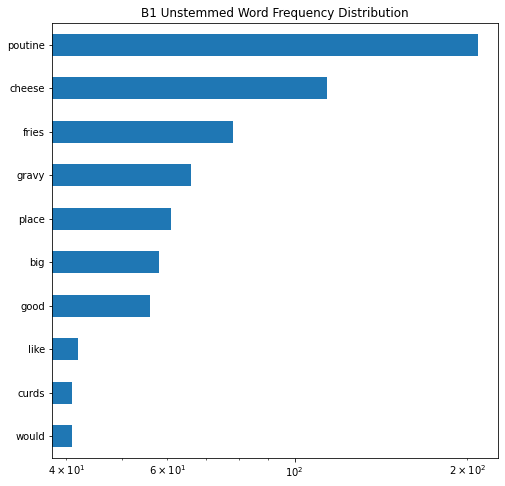

In [21]:
bar_plotter(B1_word_frequencies_unstemmed,
            title = "B1 Unstemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

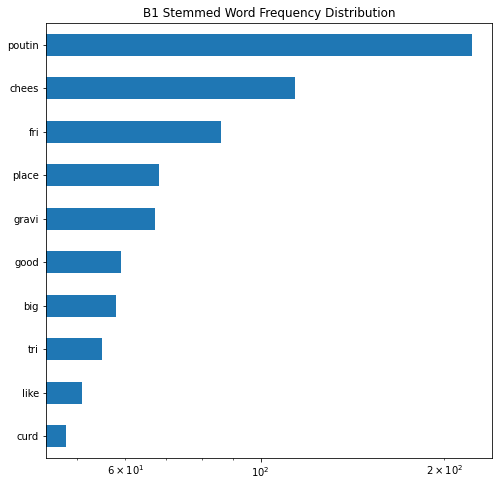

In [22]:
bar_plotter(B1_word_frequencies_stemmed,
            title = "B1 Stemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

### B2

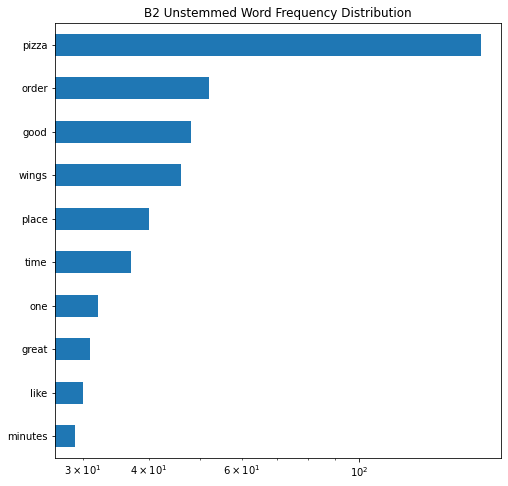

In [23]:
bar_plotter(B2_word_frequencies_unstemmed,
            title = "B2 Unstemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

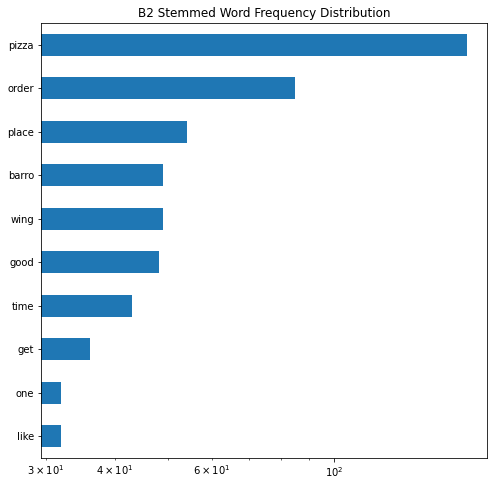

In [24]:
bar_plotter(B2_word_frequencies_stemmed,
            title = "B2 Stemmed Word Frequency Distribution",
            top_n = 10,
            logx = True)

In [7]:
B1

["Food: 2.5/5\nAtmosphere: 3.5/5\nService: 3.5/5\nOverall experience: 3/5\n\n(1- Terrible; 3- decent; 5- Fantastic)\n\nAfter seeing pictures my friends took of a monstrocity of a poutine i just had to check out Big Cheese. Once you walk in, a small walkway guides you to the front where a giant menu board hangs over an open kitchen. After placing your order you can wait in their small dining area which could probably hold 10-15 people. There is more room in their back patio if you decide to stay and eat.\n\nThere are two sizes, small or large with about $2 difference. There portions are fairly large so I suggest getting a small if you want to avoid food coma for the rest of the day. The prices range from $7 - $10 and a choice between traditional, pork, chicken or beef products on top of the poutine. We went on the weekend so our fries came out pretty fast. We didn't have to wait for more than 5 minutes.\n\nMy bf ordered a small Traditional Poutine ($5.49 - Quebec cheese curds and poutin